In [5]:
!pip install numpy matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 597.1 kB/s eta 0:00:16
   -- ------------------------------------- 0.5/9.7 MB 597.1 kB/s eta 0:00:16
   -- ------------------------------------- 0.5/9.7 MB 597.1 kB/s eta 0:00:1


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [15]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

y = np.array([[0],[1],[1],[0]])


In [16]:
np.random.seed(42)

input = 2
hidden = 4
output = 1

W1 = np.random.randn(input, hidden) * 0.1
b1 = np.zeros((1, hidden))

W2 = np.random.randn(hidden, output) * 0.1
b2 = np.zeros((1, output))


In [17]:
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    yout = sigmoid(z2)

    return z1, a1, z2, yout


In [18]:
def compute_loss(y, y_hat):
    return np.mean((y - yout)**2)


In [19]:
def backward(X, y, z1, a1, z2, yout, lr=0.1):
    global W1, b1, W2, b2


    error = y - yout
    d_output = error * sigmoid_derivative(yout)


    error_hidden = np.dot(d_output, W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    W2 += np.dot(a1.T, d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr

    W1 += np.dot(X.T, d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr


In [20]:
epochs = 10000
losses = []

for i in range(epochs):
    z1, a1, z2, yout = forward(X)
    loss = compute_loss(y, yout)
    losses.append(loss)

    backward(X, y, z1, a1, z2, yout, lr=0.1)

    if i % 1000 == 0:
        print(f"Epoch {i}, Loss: {loss}")


Epoch 0, Loss: 0.25013239213983735
Epoch 1000, Loss: 0.2500007576740669
Epoch 2000, Loss: 0.25000068623637617
Epoch 3000, Loss: 0.25000062230362363
Epoch 4000, Loss: 0.2500005648291614
Epoch 5000, Loss: 0.25000051293819436
Epoch 6000, Loss: 0.2500004658948959
Epoch 7000, Loss: 0.25000042307660253
Epoch 8000, Loss: 0.2500003839534001
Epoch 9000, Loss: 0.2500003480718489


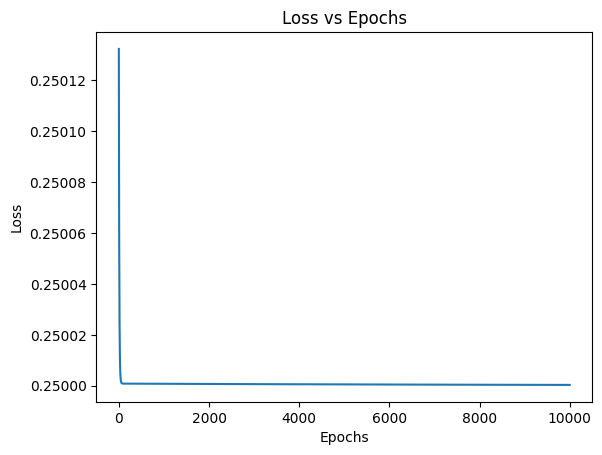

In [21]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()


In [22]:
_, _, _, y_pred = forward(X)
print("Predictions:")
print(y_pred)


Predictions:
[[0.50034119]
 [0.50006479]
 [0.49995411]
 [0.49967875]]
